# Kaggle Competition

## Python Library

On génére les libraries essentielles pour faire notre étude. 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold

import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import mean_absolute_error

## Import data_train and data_test

On importe nos deux données. 

In [57]:
data = pd.read_csv("Train.csv")
data_test = pd.read_csv("TestForStudents.csv")

In [58]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
0,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,1,0,1,1,-1,165,2,24,Friday,0
1,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,474,143,331,459,-188,14,324,24,Saturday,31
2,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,1033,285,748,943,-463,20,153,24,Monday,55
3,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,1521,536,985,1437,-449,28,506,24,Friday,161
4,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,271,2,50,259,-48,53,105,24,Saturday,3


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2091 non-null   int64  
 1   X2      2091 non-null   int64  
 2   X3      2091 non-null   int64  
 3   X4      2091 non-null   object 
 4   X5      2091 non-null   int64  
 5   X6      2091 non-null   int64  
 6   X7      2091 non-null   float64
 7   X8      2091 non-null   float64
 8   X9      2091 non-null   float64
 9   X10     2091 non-null   int64  
 10  X11     2091 non-null   int64  
 11  X12     2091 non-null   float64
 12  X13     2091 non-null   float64
 13  X14     2091 non-null   float64
 14  X15     2091 non-null   int64  
 15  X16     2091 non-null   int64  
 16  X17     2091 non-null   float64
 17  X18     2091 non-null   float64
 18  X19     2091 non-null   float64
 19  X20     2091 non-null   int64  
 20  X21     2091 non-null   int64  
 21  X22     2091 non-null   float64
 22  

Le données (Train) possède 37 covariables et une variable cible quantitative. Les covariables sont majoritairement quantitative excepté X4 et X38. Nous devons convertir les variables X4 et X38 en float afin de réaliser l'étude. 

## Convert to categorical variable 

Nous allons donc utiliser le processus LabelEncoder afin d'encoder les variables avant de les scinder en deux échantillons.
On effectue maintenant des processus d'encodage pour changer le type des variables X4 et X38. Cela est nécessaire pour changer la valeur des variables. Pour cela, on va convertir les variables en array, puis les recadrer afin d'avoir une matrice colonne. À la suite de ces étapes, on entraîne et on transforme nos variables.

In [60]:
from sklearn.preprocessing import LabelEncoder
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(data["X4"])
X4_encoded = label_encoder.transform(data["X4"])

label_encoder2 = LabelEncoder()
label_encoder2 = label_encoder.fit(data["X38"])
X38_encoded = label_encoder.transform(data["X38"])

data.insert(3, "X4_bis", X4_encoded, allow_duplicates=False)
data.insert(38, "X38_bis", X38_encoded, allow_duplicates=False)

On essaie de voir quel encodage nous avons effectuer pour la variable X4. 

In [63]:
for k in range(len(data["X4"].unique())):
    print(f"{data.X4.unique()[k]} : {data.X4_bis.unique()[k]}")

Source1 : 0
Source4 : 36
Source5 : 44
Source8 : 67
Source9 : 75
Source13 : 8
Source16 : 11
Source17 : 12
Source18 : 13
Source19 : 14
Source20 : 16
Source21 : 17
Source22 : 18
Source23 : 19
Source24 : 20
Source25 : 21
Source14 : 9
Source28 : 24
Source29 : 25
Source30 : 27
Source31 : 28
Source32 : 29
Source36 : 33
Source27 : 23
Source38 : 34
Source39 : 35
Source34 : 31
Source33 : 30
Source46 : 41
Source47 : 42
Source45 : 40
Source49 : 43
Source50 : 45
Source54 : 47
Source44 : 39
Source57 : 50
Source58 : 51
Source60 : 54
Source2 : 15
Source26 : 22
Source67 : 59
Source6 : 53
Source72 : 61
Source73 : 62
Source75 : 63
Source59 : 52
Source76 : 64
Source63 : 57
Source77 : 65
Source42 : 38
Source68 : 60
Source12 : 7
Source79 : 66
Source80 : 68
Source35 : 32
Source81 : 69
Source82 : 70
Source83 : 71
Source10 : 1
Source87 : 73
Source62 : 56
Source89 : 74
Source90 : 76
Source55 : 48
Source11 : 6
Source93 : 79
Source96 : 80
Source100 : 2
Source91 : 77
Source101 : 3
Source85 : 72
Source40 : 37
Sourc

On essaie de voir quel encodage nous avons effectuer pour la variable X38. 

In [64]:
for k in range(len(data["X38"].unique())):
    print(f"{data.X38.unique()[k]} : {data.X38_bis.unique()[k]}")

Friday : 0
Saturday : 2
Monday : 1
Wednesday : 6
Sunday : 3
Thursday : 4
Tuesday : 5


On supprime nos variables X4 et X38 car ils ne servent à rien. 

In [65]:
data = data.drop(["X4", "X38"], axis=1)

On s'assure que les variables sont bien numériques car nous tenterons de faire des régressions vu que la variable cible est numérique.

In [66]:
data = data.apply(pd.to_numeric)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X1       2091 non-null   int64  
 1   X2       2091 non-null   int64  
 2   X3       2091 non-null   int64  
 3   X4_bis   2091 non-null   int64  
 4   X5       2091 non-null   int64  
 5   X6       2091 non-null   int64  
 6   X7       2091 non-null   float64
 7   X8       2091 non-null   float64
 8   X9       2091 non-null   float64
 9   X10      2091 non-null   int64  
 10  X11      2091 non-null   int64  
 11  X12      2091 non-null   float64
 12  X13      2091 non-null   float64
 13  X14      2091 non-null   float64
 14  X15      2091 non-null   int64  
 15  X16      2091 non-null   int64  
 16  X17      2091 non-null   float64
 17  X18      2091 non-null   float64
 18  X19      2091 non-null   float64
 19  X20      2091 non-null   int64  
 20  X21      2091 non-null   int64  
 21  X22      2091 

In [68]:
n1, d1 = data.shape
print(f"la taille des données d'entrainement est de {n1}x{d1} \n")

la taille des données d'entrainement est de 2091x39 



## Training and test samples

On coupe l'échantillon en deux parties. La première partie (apprentissage) qui se chargera d'apprendre au modèle, et la seconde partie (test) qu'on utilisera pour réaliser le test du modèle pour comparer les valeurs de la variable cible.

In [69]:
X = data.drop(["Y"], axis=1).copy()
X.head()

,X1,X2,X3,X4_bis,X5,X6,X7,X8,X9,X10,...,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38_bis
0,634995,0,463,0,0,806,11.291045,1.0,70.495138,0,...,69.850580,1,0,1,1,-1,165,2,24,0
1,3995273,0,297147,36,43,2007,603.141026,494.5,424.681501,1,...,481.588874,474,143,331,459,-188,14,324,24,2
2,3995273,0,297147,36,43,2007,603.141026,494.5,424.681501,1,...,481.588874,1033,285,748,943,-463,20,153,24,1
3,3995273,0,297147,36,43,2007,603.141026,494.5,424.681501,1,...,481.588874,1521,536,985,1437,-449,28,506,24,0
4,3995273,0,297147,36,43,2007,603.141026,494.5,424.681501,1,...,481.588874,271,2,50,259,-48,53,105,24,2


## Heatmap of correlation matrix 

Il peut être intéressant d'étuder la corrélation entre les variables. 

Text(0.5, 1.0, 'Covariance Matrix')

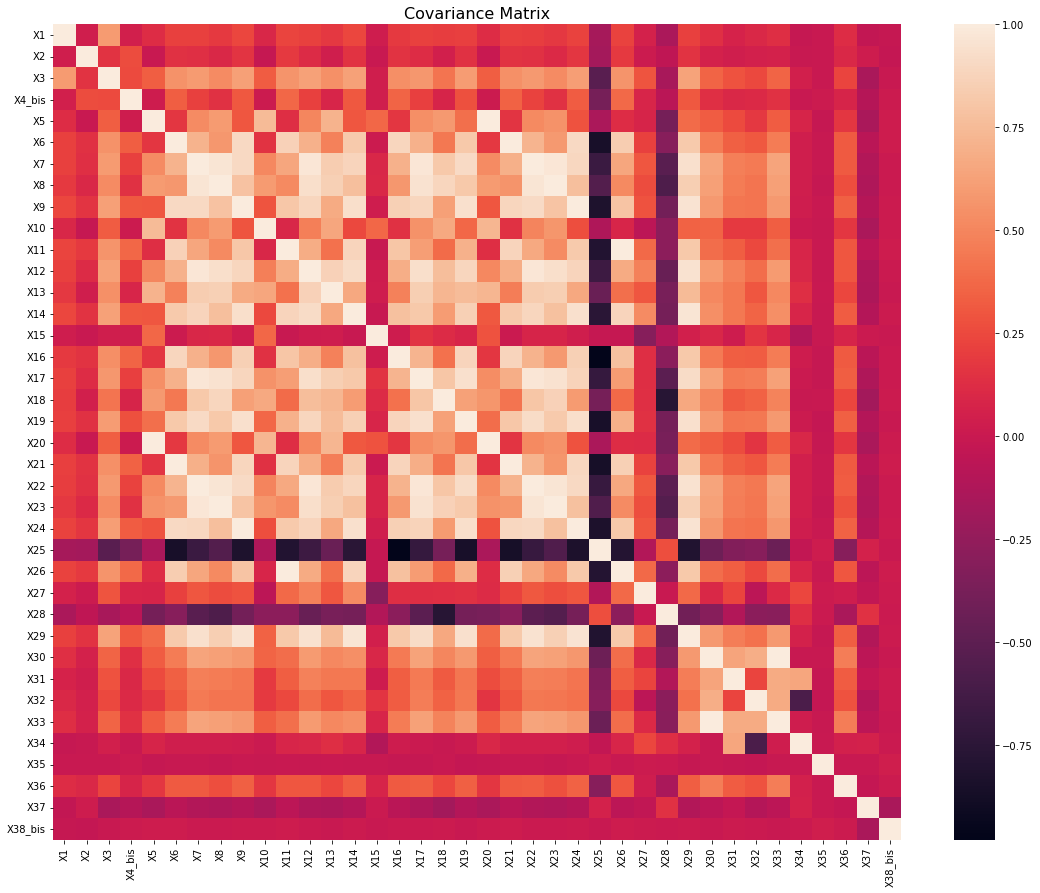

In [70]:
df = pd.DataFrame(X)
corr_df = df.corr(method='pearson') 
f = plt.figure(figsize=(19, 15))
sns.heatmap(corr_df)
#cb.ax.tick_params(label=FALSE,labelsize=0)
plt.title('Covariance Matrix', fontsize=16)

In [71]:
Y = data["Y"].copy()
Y.head()

0      0
1     31
2     55
3    161
4      3
Name: Y, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state=2)
n_train, _ = X_train.shape
print(X_train.shape, X_test.shape)

(1672, 38) (419, 38)


Pour choisir le meilleur modèle, nous allons entraîner différent modèle de régression et évaluer via la métrique MAE. À la fin, nous nous concerterons pour choisir le meilleur modèle. Pour calculer la MAE, nous utiliserons la fonction mean_absolute_error du modèle scikit_learn.metrics. 

# Simple Learning Model

Pour chaque modèle possible, nous effectuerons une validation croisée de 10 blocs pour optimiser les hyperparamètres afin d'avoir le meilleur modèle possible. Pour les régressions Lasso et Ridge, cette procédure est directement mis en avant dans les paramètres. 

## Linear Regression

In [73]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [74]:
y_test_pred_reg = reg.predict(X_test)
MAE_reg=mean_absolute_error(y_test_pred_reg, y_test)
print("MAE of Linear Regression:","%.3f" %  MAE_reg)

MAE of Linear Regression: 7.601


On trouve un $R^{2}$ très inférieur à 0.5 et une MSE est très élevée. Cela signifique le modèle est très mauvais.

## LASSO Regression

Il faut optimiser nos paramètres afin d'avoir le meilleur modèle possible. 

In [75]:
lasso = LassoCV(alphas = [k*10 for k in range(2,10)], cv=10)
lasso.fit(X_train, y_train)

# The estimator chose automatically its lambda:
print(lasso.alpha_)

y_test_pred_lasso = lasso.predict(X_test)
MAE_lasso=mean_absolute_error(y_test_pred_lasso, y_test)
print("MAE of LASSO:","%.3f" %  MAE_lasso)

40
MAE of LASSO: 6.807


## Linear Regression with selected variables via Lasso penalization

Nous réaliserons une régression linéaire avec les variables sélectionnés par la pénalisation Lasso (norme L1). Pour sélectionner les variables, nous nous intéresserons aux coefficients des variables qui sont différents de 0. 

In [76]:
print("Selected variables with LASSO %s " % np.sum(lasso.coef_ > 0 ))

Selected variables with LASSO 6 


In [77]:
variable_select = []
for k in range(len(X.columns)):
    if lasso.coef_[k] == False : 
        variable_select.append(X_train.columns[k])

In [78]:
X_train_sel_lasso = X_train.drop(variable_select, axis=1).copy()
X_test_sel_lasso = X_test.drop(variable_select, axis=1).copy()

regr2Lasso = LinearRegression()
regr2Lasso.fit(X_train_sel_lasso, y_train)

LinearRegression()

In [79]:
y_test_pred_lassols = regr2Lasso.predict(X_test_sel_lasso)

MAE_LSLASSO = mean_absolute_error(y_test_pred_lassols, y_test)
print("MAE of LASSOLS:","%.3f" %  MAE_LSLASSO)

MAE of LASSOLS: 6.844


## RIDGE Regression

In [80]:
ridge = RidgeCV(alphas = [0.1*k for k in range(1,10)], cv = 10)
ridge.fit(X_train,y_train)
ridge.alpha_ 

y_test_pred_ridge = ridge.predict(X_test)
MAE_ridge=mean_absolute_error(y_test_pred_ridge, y_test)
print("MAE of RIDGE:","%.3f" %  MAE_ridge)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58832e-18): result may not be accurate.
  overwrite_a=True).T
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61075e-18): result may not be accurate.
  overwrite_a=True).T
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6071e-18): result may not be accurate.
  overwrite_a=True).T
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.75379e-18): result may not be accurate.
  overwrite_a=True).T
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61042e-18): result may not be accurate.
  overwrite_a=True).T
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_mod

MAE of RIDGE: 7.619


/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.57253e-18): result may not be accurate.
  overwrite_a=True).T


## Support Vector Regressor

Avant d'utiliser le modèle SVR, on standardise nos variables (c'est-à-dire qu'on les centre et on réduit) pour qu'elles se placent toutes à la même échelle. 

In [81]:
from sklearn.preprocessing import StandardScaler
scaler_sd = StandardScaler()

# Get scaling parameters with the train sample exclusively, using the Scaler.fit() function
scaler_sd.fit(X_train)

# Scale data using Scaler.transform()
X_train_scaled = pd.DataFrame(scaler_sd.transform(X_train))
X_test_scaled = pd.DataFrame(scaler_sd.transform(X_test))

Nous pouvons maintenant entrainer notre SVR tout en optimisant les paramètres. 

In [87]:
from sklearn.svm import SVR, LinearSVR

In [88]:
regr = SVR()

parameters_regr = {"C" : [1,2,3,4],
                  "epsilon" : [0.1, 0.2, 0.3, 0.4],
                  "kernel": ("linear", "rbf")}

optSVR = GridSearchCV(regr,
                    parameters_regr, 
                    cv=KFold(n_splits=10)
                   )
optSVR.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4], 'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'kernel': ('linear', 'rbf')})

In [90]:
y_test_pred_optSVR = optSVR.predict(X_test_scaled)
MAE_optSVR=mean_absolute_error(y_test_pred_optSVR, y_test)
print("MAE of SVR:","%.3f" %  MAE_optSVR)

MAE of SVR: 5.625


In [ ]:
scaler_sd.fit(X_train_sel_lasso)

# Scale data using Scaler.transform()
X_train_sel_lasso_scaled = pd.DataFrame(scaler_sd.transform(X_train_sel_lasso))
X_test_sel_lasso_scaled = pd.DataFrame(scaler_sd.transform(X_test_sel_lasso))

In [ ]:
regr = SVR()

parameters_regr = {"C" : [1,2,3,4],
                  "epsilon" : [0.1, 0.2, 0.3, 0.4],
                  "kernel": ("linear", "rbf")}

optSVR = GridSearchCV(regr,
                    parameters_regr, 
                    cv=KFold(n_splits=10)
                   )
optSVR.fit(X_train_sel_lasso_scaled, y_train)

In [ ]:
y_test_lasso_pred_optSVR = optSVR.predict(X_test_sel_lasso_scaled)
MAE_optSVR=mean_absolute_error(y_test_lasso_pred_optSVR, y_test)
print("MAE of SVR_lasso:","%.3f" %  MAE_optSVR)

## DecisionTreeRegression

In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
DTR= DecisionTreeRegressor(min_samples_leaf=200)
DTR.fit(X_train, y_train)

y_test_pred_DTR = DTR.predict(X_test)
MAE_DTR=mean_absolute_error(y_test_pred_DTR, y_test)
print("MAE of Single Tree:","%.3f" %  MAE_DTR)

MAE of Single Tree: 7.631


# Ensemble Learning

Cette fois-ci, on entraine les modèles d'ensemble learning. Il faut optimiser les hyperparamètres pour entrainer les modèles. 

## Bagging Regressor

In [92]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [93]:
tree = DecisionTreeRegressor()
bag = BaggingRegressor(tree, random_state=1)
tree_parameters = {'n_estimators' : [ 50, 100, 200]}
    
optBagg = GridSearchCV(bag, tree_parameters, cv=KFold(n_splits=10))

optBagg.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=1),
             param_grid={'n_estimators': [50, 100, 200]})

In [94]:
y_test_pred_Bagg = optBagg.predict(X_test)
MAE_Bagg=mean_absolute_error(y_test_pred_Bagg, y_test)
print("MAE of Bagging of Trees:","%.3f" %  MAE_Bagg)

MAE of Bagging of Trees: 5.991


## RandomForest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor  #useful if we want to compute the importance of features

In [96]:
RF = RandomForestRegressor("absolute_error")
RF_parameters = {"n_estimators" : [ 100, 200],
                 "max_features" : [2,3,4,5]}
    
optRF = GridSearchCV(RF, RF_parameters, cv=KFold(n_splits=10))

optRF.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_estimators='absolute_error'),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [100, 200]})

In [97]:
y_test_pred_RF = optRF.predict(X_test)
MAE_RF=mean_absolute_error(y_test_pred_RF, y_test)
print("MAE of Random Forest:","%.3f" %  MAE_RF)

MAE of Random Forest: 6.178


## Gradient Boosting Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
GBR = GradientBoostingRegressor()

GBR_parameters = {'learning_rate' : [ 0.1,0.2,0.3,0.4],
            'n_estimators' : [200,300,400]  }

optGBR = GridSearchCV(GBR, GBR_parameters, cv=KFold(n_splits=10))

optGBR.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [200, 300, 400]})

In [100]:
y_test_pred_GBR = optGBR.predict(X_test)

MAE_GBR = mean_absolute_error(y_test_pred_GBR, y_test)
print("MAE of Gradient Boosting Regressor:","%.3f" %  MAE_GBR)

MAE of Gradient Boosting Regressor: 5.878


## AdaBoost Regressor

In [101]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
AR = AdaBoostRegressor()

AR_parameters = {
    'learning_rate' : [k for k in range(1,10)],
    'n_estimator' : [100*k for k in range(1,10)]
}

optGBR = GridSearchCV(AR, AR_parameters, cv=KFold(n_splits=10))

AR.fit(X_train, y_train)

AdaBoostRegressor()

In [103]:
y_test_pred_AR = AR.predict(X_test)
MAE_AR = mean_absolute_error(y_test_pred_AR, y_test)
print("MAE of AdaBoost Regressor:","%.3f" %  MAE_AR)

MAE of AdaBoost Regressor: 8.056


## Stacking Regressor 

In [104]:
from sklearn.ensemble import StackingRegressor

estimators = [('lr', reg),
              ('svr', LinearSVR())]

SR = StackingRegressor( estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=200))

SR.fit(X_train, y_train)
y_test_pred_SR = SR.predict(X_test)
    
MAE_SR = mean_absolute_error(y_test_pred_SR, y_test)
print("MAE of Stacking Regressor:","%.3f" %  MAE_SR)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/tljh/user/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/tljh/user/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/tljh/user/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/tljh/user/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

MAE of Stacking Regressor: 7.588


## Results

In [105]:
print("MAE (Mean Absolute Error) for:\n", 
     "- Linear Regression: ", "%.3f" % MAE_reg,"\n",
     "- Lasso Regression: ", "%.3f" % MAE_lasso, "\n",
     "- Linear Selected Lasso Regression: ", "%.3f" % MAE_LSLASSO, "\n",
     "- Ridge Regression: ", "%.3f" % MAE_ridge, "\n",
     "- Support Vector Regression: ", "%.3f" % MAE_optSVR, "\n",
     "- DecisionTreeRegression: ", "%.3f" % MAE_DTR, "\n",
     "- Bagging of trees: ", "%.3f" % MAE_Bagg,"\n",
     "- Random Forest: ", "%.3f" % MAE_RF, "\n",
     "- Gradient Boosting Regressor: ", "%.3f" % MAE_GBR, '\n',
     "- AdaBoost Regressor: ", "%.3f" % MAE_AR, '\n',
     "- Stacking Regressor: ", "%.3f" % MAE_SR
     )

MAE (Mean Absolute Error) for:
 - Linear Regression:  7.601 
 - Lasso Regression:  6.807 
 - Linear Selected Lasso Regression:  6.844 
 - Ridge Regression:  7.619 
 - Support Vector Regression:  5.625 
 - DecisionTreeRegression:  7.631 
 - Bagging of trees:  5.991 
 - Random Forest:  6.178 
 - Gradient Boosting Regressor:  5.878 
 - AdaBoost Regressor:  8.056 
 - Stacking Regressor:  7.588


Comme on peut le constater, aucune des modèles utilisées n'est assez performant. Nous choisirons donc celui qui possède le MAE le moins élevé. Il s'agit du Support Vector Regression. 

# Test our model on data_test 

En vu des résultats précédents, on utilisera la SVR car il possède la plus petite MAE. 

In [106]:
data_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38
0,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.85058,0,0,0,0,0,166,2,24,Wednesday
1,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.85058,0,0,0,0,0,132,1,24,Thursday
2,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.85058,0,0,0,0,0,133,2,24,Friday
3,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.85058,7,0,3,7,-3,131,1,24,Friday
4,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.85058,1,0,0,1,0,142,5,24,Monday


On effectue maintenant des processus d'encodage pour changer le type des variables X4 et X38. Cela est nécessaire pour changer la valeur des variables. Pour cela, on va convertir les variables en array, puis les recadrer afin d'avoir une matrice colonne. À la suite de ces étapes, on entraîne et on transforme nos variables. 

In [107]:
enc1_test = preprocessing.OrdinalEncoder(categories='auto')
enc2_test = preprocessing.OrdinalEncoder(categories='auto')

In [108]:
X4_test = data_test["X4"].to_numpy()
X4_test = X4_test.reshape(-1,1)

enc1_test.fit(X4_test)

X4_bis_test = enc1.transform(X4_test)

data_test.insert(3, "X4_bis", X4_bis_test, allow_duplicates=False)

In [109]:
X38_test = data_test["X38"].to_numpy()
X38_test = X38_test.reshape(-1,1)

enc2_test.fit(X38_test)

X38_bis_test = enc2_test.transform(X38_test)

data_test.insert(38, "X38_bis", X38_bis_test, allow_duplicates=False)

On supprime les colonnes X4 et X38 des données car ils nous servent plus à rien. 

In [110]:
data_test = data_test.drop(["X4", "X38"], axis=1).copy()

On standardise nos données. 

In [111]:
data_test_scaled = pd.DataFrame(scaler_sd.transform(data_test))

On entraîne nos modèles sur les échantillons d'apprentissage. 

In [ ]:
optSVR.fit(X_train_scaled, y_train)
y_test_output = optSVR.predict(data_test_scaled)

In [ ]:
y_test_df = pd.DataFrame(y_test_output)

In [ ]:
y_test_df.columns = ["Y"]

On exporte nos données de façon à ce qu'il vérifie le code de R, c'est-à-dire : 
- un nombre de colonne exacte;
- un nombre de ligne exacte;
- on peut comparer les données;

In [ ]:
output_csv_data = y_test_df.to_csv('id1789.csv', index = False, header = False)